# Clasificación Multiclase con MLPClassifier
Este notebook muestra cómo entrenar y visualizar un perceptrón multicapa (MLP) para clasificar datos sintéticos. Se explican los pasos principales: generación de datos, entrenamiento, evaluación y visualización de la superficie de decisión.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

## Generación de datos
### Datos del entrenamiento para el EX-OR real


In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

#### Gráfico de los datos de entrenamiento

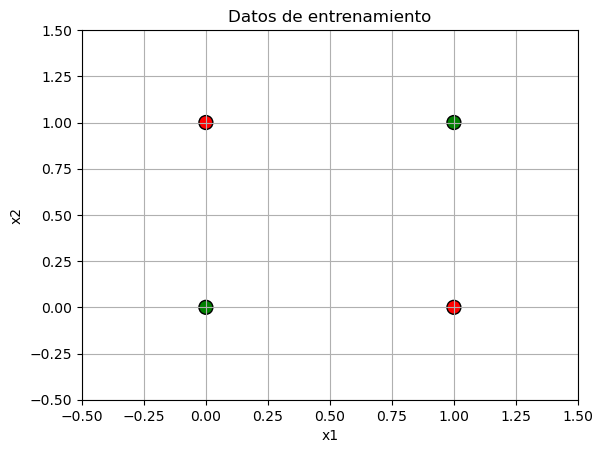

In [3]:
colors = ['green' if label == 0 else 'red' for label in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolors='k')
plt.title("Datos de entrenamiento")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

### Utilizamos `make_blobs` para generar un conjunto de datos sintéticos con 4 centros en dos clases.

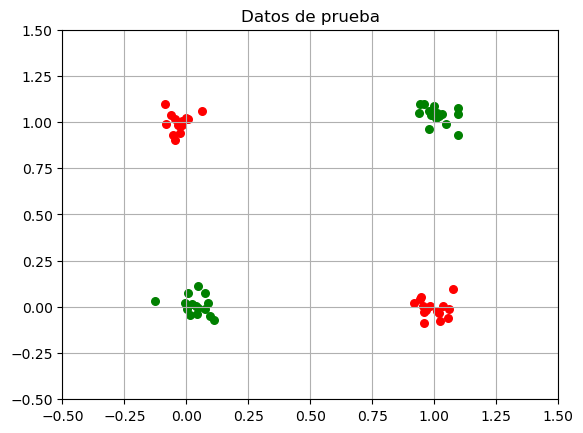

In [4]:
n_samples = 60
blob_centers = ([0, 0], [0, 1], [1, 0], [1, 1])
data, labels = make_blobs(n_samples=n_samples,
                          centers=blob_centers,
                          cluster_std=0.05,
                          random_state=0)

# Visualización inicial
colours = ('green', 'red', 'red', 'green')
fig, ax = plt.subplots()
for n_class in range(len(blob_centers)):
    ax.scatter(data[labels==n_class][:, 0],
               data[labels==n_class][:, 1],
               c=colours[n_class], s=30)

plt.title("Datos de prueba")
plt.grid(True)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

## Entrenamiento del clasificador MLP
Entrenamos un MLPClassifier con el solver `lbfgs` y visualizamos la precisión.

In [50]:
# Parámetros de red neuronal
hidden_layer_sizes = (4, )  # Cantidad de capas ocultas y neuronas por capa

In [51]:
# clf = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='tanh', solver='adam', max_iter=100000)

In [52]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=hidden_layer_sizes, random_state=1)

In [53]:
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4,), random_state=1,
              solver='lbfgs')

## Visualización de la superficie de decisión
Se grafica la región de decisión aprendida por el modelo MLP junto con los datos reales.

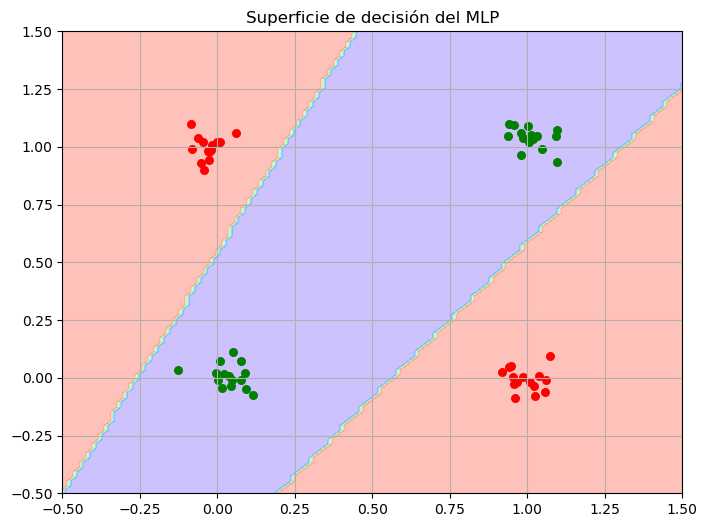

In [54]:
# Definir los límites del gráfico
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
h = 0.02  # resolución de la malla
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)
for n_class in range(len(blob_centers)):
    plt.scatter(data[labels==n_class][:, 0],
                data[labels==n_class][:, 1],
                c=colours[n_class], s=30,
                label=f"Clase {n_class}")
plt.title("Superficie de decisión del MLP")
plt.grid(True)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()